In [13]:
import pandas as pd
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import math

## 한글폰트 사용 시 그래프에서 마이너스 부호가 깨지지 않도록 해줌
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

plt.rc('font', size=15)        # 기본 폰트 크기
plt.rc('axes', labelsize=14)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=13)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=2) # figure title 폰트 크기

In [14]:
## patient_info에서 patientID랑 pRNN 가져오기
import pymysql

db = pymysql.connect(host='115.137.160.190', user='MinguKang', password = 'ASdfseol779$', port = 3306, db='drugdb', charset='utf8')
cursor = db.cursor()

#sql = "insert into prescription_record (patientID,hosID,drugID,doctorID,prescription_amount,day,state) values(" + 
sql ="select patientID, pRNN, age from patient_info" + ";"
cursor.execute(sql)

ID_RNN = pd.DataFrame(cursor.fetchall())
ID_RNN = ID_RNN.rename(columns = {0 : 'patientID', 1 : 'pRNN', 2 : 'age'})
ID_RNN['patientID'] = ID_RNN['patientID'].astype('str')
db.close()

In [15]:
import pymysql

db = pymysql.connect(host='115.137.160.190', user='MinguKang', password = 'ASdfseol779$', port = 3306, db='drugdb', charset='utf8')
cursor = db.cursor()

#sql = "insert into prescription_record (patientID,hosID,drugID,doctorID,prescription_amount,day,state) values(" + 
sql = "select * from prescription_record" + ";"
cursor.execute(sql)
db.close()

prescription = pd.DataFrame(cursor.fetchall())
prescription = prescription.rename(columns = {0 : 'patientID', 1 : 'hosID', 2 : 'drugID', 3 : 'doctorID', 4 : 'prescription_amount', 5 : 'visit_date'})

prescription.patientID = prescription.patientID.astype('str')
prescription.hosID = prescription.hosID.astype('str')
prescription.drugID = prescription.drugID.astype('str')
prescription.doctorID = prescription.doctorID.astype('str')

prescription = prescription.sort_values(by = 'visit_date')

In [16]:
prescription = pd.merge(prescription, ID_RNN, on = 'patientID', how = 'inner')
prescription['gender'] = prescription['pRNN']

def gender_func(row):
    if row['gender'][7] == '1':
        row['gender'] = '남'
    elif row['gender'][7] == '2':
        row['gender'] = '여'
    elif row['gender'][7] == '3':
        row['gender'] = '남'
    elif row['gender'][7] == '4':
        row['gender'] = '여'
    
    return row

# 함수 적용
prescription = prescription.apply(gender_func, axis = 1)

def age_func(row):
    row['age'] = math.floor(row['age'] / 10) * 10
    return row

prescription = prescription.apply(age_func, axis = 1)




환자 ID를 입력하세요 : 783


환자 전체의 졸피뎀 평균 복용량은 2.48 (mg) 입니다.

귀하의 졸피뎀 평균 복용량은 3.2 (mg) 입니다.

귀하는 평균 복용량보다 29.03 (%) 많이 복용하고 있습니다.





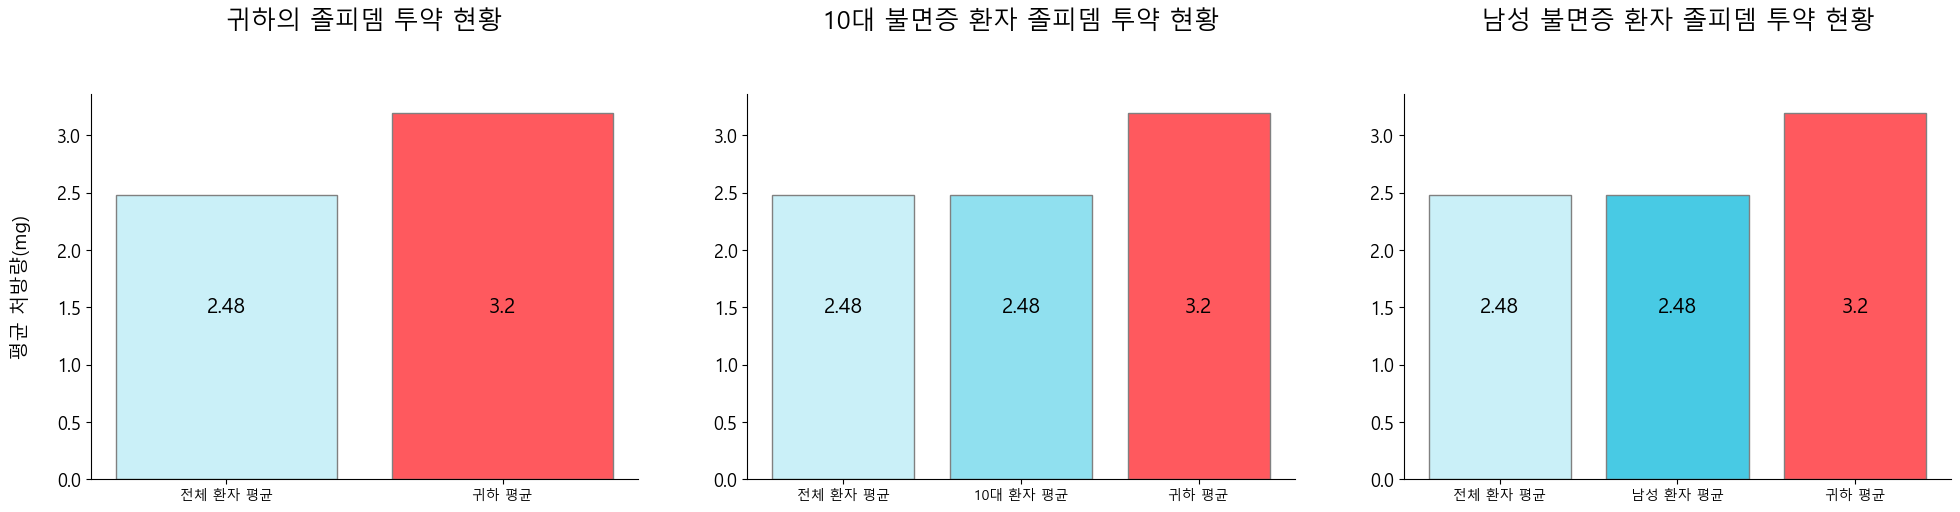

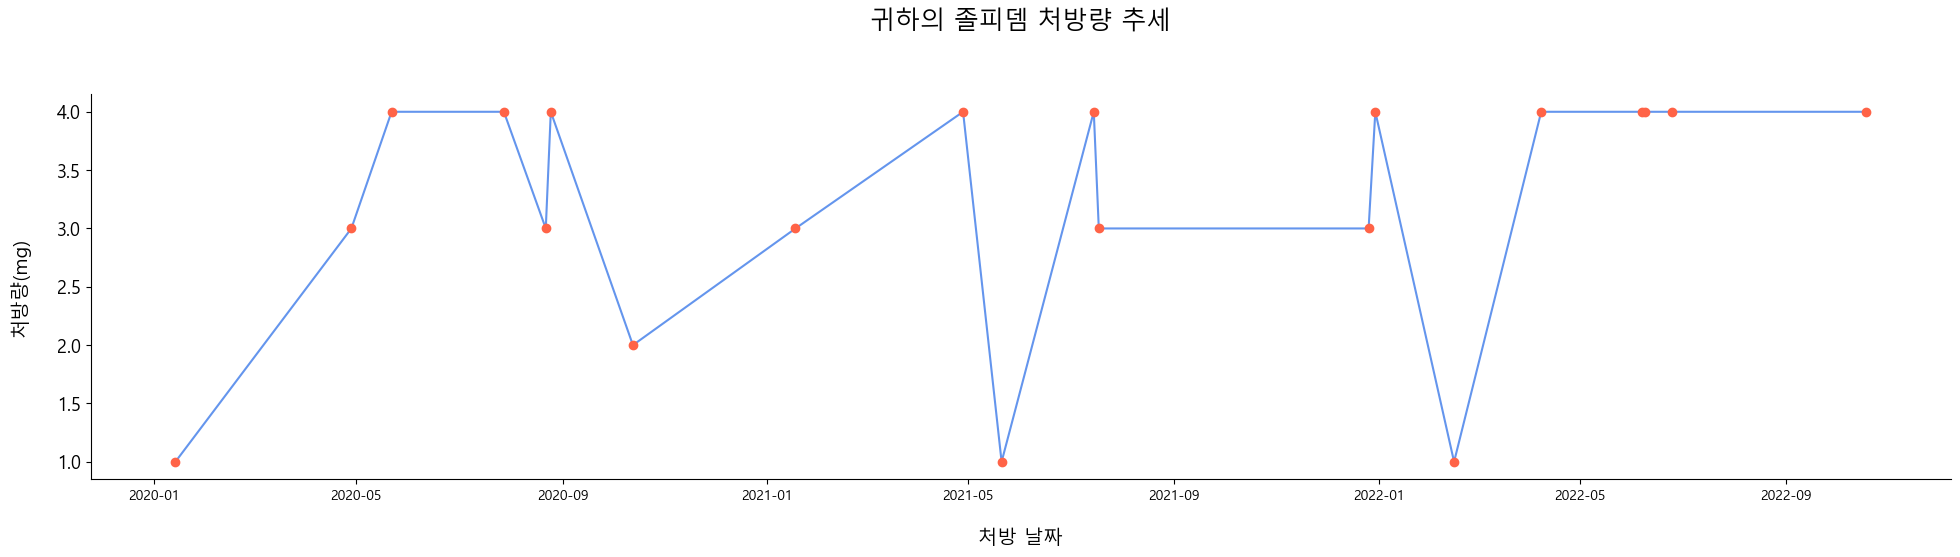

In [18]:
print()
print()
print()
num = str(input('환자 ID를 입력하세요 : '))

pat = prescription.loc[prescription['patientID'] == num]
drug_prescription = prescription.loc[prescription.drugID == pat.iloc[-1].drugID]

same_age = drug_prescription.loc[drug_prescription.age == pat.iloc[-1].age]
same_gender = drug_prescription.loc[drug_prescription.gender == pat.iloc[-1].gender]

if pat.iloc[-1].drugID == '1': 
    drug = "케타민"
elif pat.iloc[-1].drugID == '2': 
    drug = "프로포폴"
elif pat.iloc[-1].drugID == '3': 
    drug = "프로포폴"
elif pat.iloc[-1].drugID == '4': 
    drug = "암페타민"
elif pat.iloc[-1].drugID == '5': 
    drug = "펜타민"    
elif pat.iloc[-1].drugID == '6': 
    drug = "GHB"
elif pat.iloc[-1].drugID == '7': 
    drug = "메틸페니데이트"    
elif pat.iloc[-1].drugID == '8': 
    drug = "조피클론"    
elif pat.iloc[-1].drugID == '9': 
    drug = "졸피뎀"
elif pat.iloc[-1].drugID == '10': 
    drug = "졸피뎀"    
elif pat.iloc[-1].drugID == '11': 
    drug = "벤조디아제핀"     

    
if pat.iloc[-1].drugID == '1': 
    disease = "케타민"
elif pat.iloc[-1].drugID == '2': 
    disease = ""
elif pat.iloc[-1].drugID == '3': 
    disease = ""
elif pat.iloc[-1].drugID == '4': 
    disease = "우울증"
elif pat.iloc[-1].drugID == '5': 
    disease = "비만"    
elif pat.iloc[-1].drugID == '6': 
    disease = "기면증"
elif pat.iloc[-1].drugID == '7': 
    disease = "주의력결핍 과잉행동장애(ADHD)"    
elif pat.iloc[-1].drugID == '8': 
    disease = "불면증"    
elif pat.iloc[-1].drugID == '9': 
    disease = "불면증"
elif pat.iloc[-1].drugID == '10': 
    disease = "불면증"    
elif pat.iloc[-1].drugID == '11': 
    disease = "불안장애"     
        
all_mean = round(np.mean(drug_prescription.prescription_amount), 2)
ss = np.std(pat.prescription_amount)
your_mean = np.mean(pat.prescription_amount)

age_mean = round(np.mean(same_age.prescription_amount), 2)
gender_mean = round(np.mean(same_gender.prescription_amount), 2)


print()
print()

print("환자 전체의", drug, "평균 복용량은", all_mean, "(mg) 입니다.")
print()

print("귀하의", drug, "평균 복용량은", your_mean, "(mg) 입니다.")
print()

if your_mean > all_mean:
    print("귀하는 평균 복용량보다", round(your_mean / all_mean * 100 - 100, 2), "(%) 많이 복용하고 있습니다.")
elif your_mean < all_mean:
    print("귀하는 평균 복용량보다", round(-(your_mean / all_mean * 100 - 100), 2), "(%) 적게 복용하고 있습니다.")
else:
    print("귀하는 적정 수준 복용하고 있습니다.")
    
    
print()    
print()
print()


# 라인차트
## prescription record 업데이트 후
## 인덱스 date로 바꿔서 plot할 것
# plt.subplot(1,1,2)

fig = plt.figure(figsize = (24, 5))
fig.add_subplot(1,3,1)

x = ['전체 환자 평균', '귀하 평균']
y = [all_mean, your_mean]
colors = ['#caf0f8', '#FF595E']
last = pat.iloc[-1]['prescription_amount']

plt.title(f'귀하의 {drug} 투약 현황\n\n')
plt.ylabel('평균 처방량(mg)\n')
plt.bar(x, y, color = colors, edgecolor='gray')
plt.text(0, your_mean/2, all_mean, verticalalignment ='top', horizontalalignment ='center')
plt.text(1, your_mean/2, your_mean, verticalalignment ='top', horizontalalignment ='center')
#plt.axhline(y=last,linewidth=1, color='k')
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거

###########################################################################################################################################################################

fig.add_subplot(1,3,2)

x = ['전체 환자 평균', f'{pat.iloc[-1].age}대 환자 평균', '귀하 평균']
y = [all_mean, age_mean, your_mean]
colors = ['#caf0f8', '#90e0ef', '#FF595E']
last = pat.iloc[-1]['prescription_amount']

plt.title(f'{pat.iloc[-1].age}대 {disease} 환자 {drug} 투약 현황\n\n')
#plt.ylabel('평균 처방량(mg)\n')
plt.bar(x, y, color = colors, edgecolor='gray')
plt.text(0, your_mean/2, all_mean, verticalalignment ='top', horizontalalignment ='center')
plt.text(1, your_mean/2, age_mean, verticalalignment ='top', horizontalalignment ='center')
plt.text(2, your_mean/2, your_mean, verticalalignment ='top', horizontalalignment ='center')
#plt.axhline(x=,linewidth=1, color='k')
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거

###########################################################################################################################################################################

fig.add_subplot(1,3,3)

x = ['전체 환자 평균', f'{pat.iloc[-1].gender}성 환자 평균', '귀하 평균']
y = [all_mean, gender_mean, your_mean]
colors = ['#caf0f8', '#48cae4', '#FF595E']
last = pat.iloc[-1]['prescription_amount']

plt.title(f'{pat.iloc[-1].gender}성 {disease} 환자 {drug} 투약 현황\n\n')
#plt.ylabel('평균 처방량(mg)\n')
plt.bar(x, y, color = colors, edgecolor='gray')
plt.text(0, your_mean/2, all_mean, verticalalignment ='top', horizontalalignment ='center')
plt.text(1, your_mean/2, gender_mean, verticalalignment ='top', horizontalalignment ='center')
plt.text(2, your_mean/2, your_mean, verticalalignment ='top', horizontalalignment ='center')
#plt.axhline(y=last,linewidth=1, color='k')
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.show()

###########################################################################################################################################################################

print()
print()
print()

###########################################################################################################################################################################

fig = plt.figure(figsize = (24, 5))
#fig.add_subplot(1,2,1)
plt.title(f'귀하의 {drug} 처방량 추세\n\n')
plt.ylabel('처방량(mg)\n')
plt.xlabel('\n처방 날짜')
plt.plot(pat.visit_date, pat.prescription_amount, marker = 'o', mec = 'tomato', mfc = 'tomato', color = 'cornflowerblue')
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
#plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.show()

############################################################################################################################################################################

# 히스토그램
#fig.add_subplot(1,2,2)
#a = prescription.copy()
#a.prescription_amount = a.prescription_amount.astype('str')

#res = a.groupby('prescription_amount').agg({'patientID' : 'count'})
#res = res.reset_index()
#res.prescription_amount = res.prescription_amount.astype('int64')
#res = res.sort_values('prescription_amount')


## 해당 환자의 가장 마지막 처방량 -> 인사이트가 별로 없음
## 삭제할지 말지 결정하기!!
#last = pat.iloc[-1]['prescription_amount']
#your_last = res[res.prescription_amount==last]
#plt.title('처방량 별 인원 분포')
#plt.xlabel('처방량')
#plt.ylabel('인원')

#plt.bar(res.prescription_amount, res.patientID, color = 'cornflowerblue')
#plt.bar(your_last['prescription_amount'], your_last['patientID'], color = 'tomato')
#plt.bar(last, res['prescription_amount'] == last, color = 'r')
#plt.ylim([res.patientID.min()-res.patientID.std(), res.patientID.max()+res.patientID.std()])
#plt.annotate("annotate - xycoords('figure points')", xy=(2, 100), xycoords='figure points' )
#plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
#plt.gca().spines['top'].set_visible(False) #위 테두리 제거
#plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
#plt.legend()

#plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.25, hspace=0.2)
#plt.show()

## prescription_record에 state 추가 시 차트 추가할 것
## state 별 평균 약물 복용량 & 현재 당신의 state와 복용량
## 귀하의 증상 추세

print()    
print()
print()
